# Is GDP per capita associated with tertiary enrollment in the United States?”
## Data Sources:
### 1. World Bank – GDP per capita (current US$), indicator NY.GDP.PCAP.CD
### 2. World Bank – School enrollment, tertiary (% gross), indicator SE.TER.ENRR


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

gdp = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_252771.csv", skiprows=4)
ter = pd.read_csv("API_SE.TER.ENRR_DS2_en_csv_v2_126152.csv", skiprows=4)

gdp.head()
ter.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,17.141621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.065542,NaN
1,Africa Eastern and Southern,AFE,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,8.573140,8.71269,8.75093,8.67273,8.71187,8.66186,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.99592,NaN,10.85436,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.269370,9.39776,9.58899,9.73876,9.93538,10.19026,NaN,NaN,NaN,NaN
4,Angola,AGO,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.782877,NaN,NaN,NaN,NaN,NaN,NaN,10.049358,9.954907,NaN


In [5]:
gdp_usa = gdp[gdp["Country Code"] == "USA"].copy()
ter_usa = ter[ter["Country Code"] == "USA"].copy()

year_cols_gdp = [col for col in gdp_usa.columns if col.isdigit()]
year_cols_ter = [col for col in ter_usa.columns if col.isdigit()]

gdp_long = gdp_usa.melt(
    id_vars=["Country Name", "Country Code"],
    value_vars=year_cols_gdp,
    var_name="year",
    value_name="gdp_per_capita"
)

ter_long = ter_usa.melt(
    id_vars=["Country Name", "Country Code"],
    value_vars=year_cols_ter,
    var_name="year",
    value_name="tertiary_enrollment"
)

gdp_long["year"] = gdp_long["year"].astype(int)
ter_long["year"] = ter_long["year"].astype(int)

gdp_long.head()
ter_long.head()

,Country Name,Country Code,year,tertiary_enrollment
0,United States,USA,1960,NaN
1,United States,USA,1961,NaN
2,United States,USA,1962,NaN
3,United States,USA,1963,NaN
4,United States,USA,1964,NaN


In [6]:
df = pd.merge(
    gdp_long[["Country Code", "year", "gdp_per_capita"]],
    ter_long[["Country Code", "year", "tertiary_enrollment"]],
    on=["Country Code", "year"],
    how="inner"
)

df = df.dropna(subset=["gdp_per_capita", "tertiary_enrollment"])

df = df[df["year"] >= 1970].copy()

df.head()
df.tail()


,Country Code,year,gdp_per_capita,tertiary_enrollment
58,USA,2018,62875.666138,88.299179
59,USA,2019,65227.956591,87.888710
60,USA,2020,64401.507435,87.567657
61,USA,2021,71307.401728,84.855087
62,USA,2022,77860.911291,79.361931


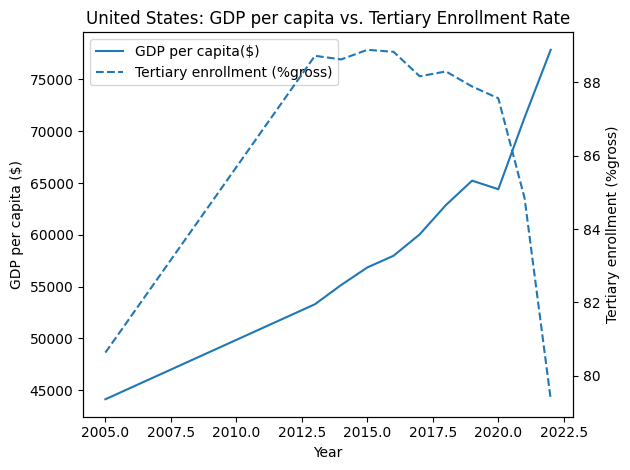

In [8]:
fig, ax1 = plt.subplots()

# Left：GDP per capita
ax1.plot(df["year"], df["gdp_per_capita"], label="GDP per capita($)")
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP per capita ($)")
ax1.tick_params(axis="y")

# Right：Tertiary enrollment
ax2 = ax1.twinx()
ax2.plot(df["year"], df["tertiary_enrollment"], linestyle="--", label="Tertiary enrollment (%gross)")
ax2.set_ylabel("Tertiary enrollment (%gross)")
ax2.tick_params(axis="y")

# Title
plt.title("United States: GDP per capita vs. Tertiary Enrollment Rate")

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.tight_layout()
plt.show()

In [9]:
corr = df[["gdp_per_capita", "tertiary_enrollment"]].corr().iloc[0, 1]
corr

np.float64(-0.23537171362606804)

### **Takeaways**

From 2005 to 2022, U.S. GDP per capita increased steadily, reflecting broad economic growth.  
In contrast, tertiary enrollment rose through the mid-2010s but then flattened and declined, with a sharp drop after 2020.

The correlation between the two variables is approximately **–0.24**, indicating a weak negative relationship.  
This suggests that higher income levels during this period did **not** correspond to higher tertiary enrollment.

Overall, the divergence between economic growth and enrollment trends implies that other structural factors—such as demographics, tuition costs, shifting perceptions of the value of higher education, and pandemic-related disruptions—played a more influential role than income alone in shaping tertiary enrollment dynamics.